# Statistik zur Entwicklung in Deutschland

In [1]:
# Bibliotheken
import numpy as np
from itertools import *
import matplotlib.pyplot as plt
from scipy.stats import kde
from scipy import stats
from scipy.stats import skew
from scipy.stats import powerlognorm
import pandas as pd
import xlrd # htps://libraries.io/conda/xlrd
from statistik import Statistik, Ausgleich
statist=Statistik()
ausgleich=Ausgleich()

# 1. Quellen
-----------------------------------------
### 1.1 Bevölkerung
1.1: 
https://de.statista.com/statistik/daten/studie/2861/umfrage/entwicklung-der-gesamtbevoelkerung-deutschlands/ 
1.2: 
https://www.bib.bund.de/DE/Fakten/Fakt/B02-Bevoelkerungsstand-1950-Vorausberechnung.html

### 1.2 Brutoinnlandsprodukt BIP
2.1: https://de.statista.com/statistik/daten/studie/1251/umfrage/entwicklung-des-bruttoinlandsprodukts-seit-dem-jahr-1991/

- Deutschland wird ganzheitlich betrachtet. Das trifft offensichtlich auch für die Zeit vor 1990 zu. Die bevölkerungsstatistik 1.1 beginnt ers mit dem Jahr 1991. Die Statistik 2.1 zum Brutoinlandsprodult nimmt keine Differenzierung zwischen BRD und DDR vor.


### 1.3 Schulden
https://www.deutschlandinzahlen.de/tab/bundeslaender/oeffentliche-haushalte/schulden/schulden-je-einwohner
https://de.statista.com/statistik/daten/studie/154798/umfrage/deutsche-staatsverschuldung-seit-2003/
https://de.statista.com/statistik/daten/studie/4778/umfrage/schulden-der-haushalte-bund-laender-und-gemeinden/


## 2. Daten aus Excel einlesen

In [2]:
df = pd.read_excel (r'./daten/DEUTSCHLAND_Mrd.xlsx', sheet_name='Finanzen_in_Mrd')
df1=np.asarray(df)

D:\ProgramData\Anaconda3\envs\nnj\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


In [3]:
DZ=5      # Veratz zur Excelnummerierung der Zeilen
Z0=DZ     # 1. Datenzeile
Z1=71+DZ  # letzte Datenzeile
jahre=    df1[Z0:Z1,1].astype(float)
einwohner=df1[Z0:Z1,2].astype(float)
schulden= df1[Z0:Z1,5].astype(float)
neuschulden=df1[Z0:Z1,6].astype(float)
BIP=      df1[Z0:Z1,7].astype(float)
steuern=df1[Z0:Z1,8].astype(float)

print('Jahre: ',jahre)
print('Einwohnerzahl          in Mill: ', einwohner, )
print('Schulden                in Mrd: ', schulden, 'in Mrd')
print('Neu-Schulden im Jahr    in Mrd: ', neuschulden, 'in Mrd')
print('Brutoinlandsprodukt BIN in Mrd: ', BIP)
print('Nominale Steuereinnahmen in Mrd: ', steuern)

Jahre:  [1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.
 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020.]
Einwohnerzahl          in Mill:  [68.7 69.1 69.4 69.8 70.1 70.5 70.9 71.4 71.9 72.4 73.  73.7 74.4 75.
 75.6 76.3 76.9 77.  77.6 78.3 78.1 78.6 78.8 79.1 78.9 78.5 78.2 78.1
 78.1 78.2 78.4 78.4 78.2 78.  77.7 77.7 77.8 77.9 78.4 79.1 79.8 80.3
 81.  81.3 81.5 81.8 82.  82.1 82.  82.2 82.3 82.4 82.5 82.5 82.5 82.4
 82.3 82.2 82.  81.9 81.8 80.3 80.5 80.8 81.2 82.2 82.5 82.8 83.  83.2
 83.4]
Schulden                in Mrd:  [   9.574   10.748   12.276   14.774   18.313   21.357   22.358   23.159
   23.992   25.463   28.999   32.216   33.109   36.026   39

In [4]:
print(len(jahre), len(einwohner), len(BIP))

71 71 71


### Diagramm

In [5]:
# Quelle: https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/
Einheitskosten2016=1907.5 # Mdr. €
Einheitsnutzen2016=2760.51 # Mrd. €
Bilanzgewinn2016=Einheitsnutzen2016-Einheitskosten2016


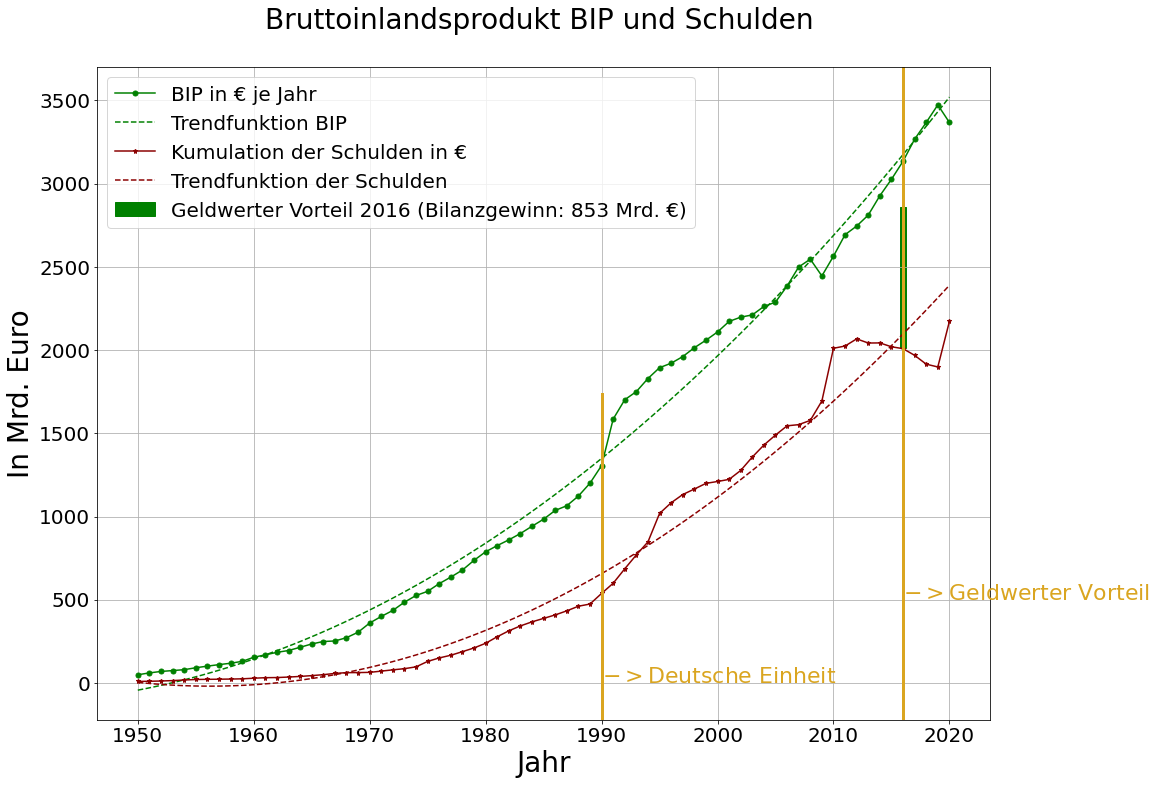

In [6]:
fig=plt.figure(figsize=(16,12))

# Tasächlicher Verlauf BIP
plt.plot(jahre, BIP, marker='o', color='green',label='BIP in € je Jahr', markersize=5)
# Ausgleichsfunktion BIP
X,Y=ausgleich.quadratisch(jahre, BIP) #,   k=[0])
plt.plot(X, Y , '--', color='green',label='Trendfunktion BIP', markersize=1)

# Tasächlicher Verlauf Schulden
plt.plot(jahre, schulden, marker='*', color='darkred',label='Kumulation der Schulden in € ', markersize=5)
# Ausgleichsfunktion Schulden
X,Y=ausgleich.quadratisch(jahre, schulden) #,   k=[0])
plt.plot(X, Y , '--', color='darkred',label='Trendfunktion der Schulden', markersize=1)

# Wendezeitpunkt
plt.axvline(x=1990, ymin=0, ymax=0.5, color="goldenrod", linewidth=3)
plt.text(1990, 0, '$->$Deutsche Einheit', fontsize = 22, color='goldenrod')
# Schulden 1990
# Geldwerter Vorteil der Deutschen Einheit
plt.axvline(x=2016, ymin=0, ymax=1, color="goldenrod", linewidth=3)
plt.text(2016, 500, '$->$Geldwerter Vorteil', fontsize = 22, color='goldenrod')
plt.arrow(2016,schulden[66]+Bilanzgewinn2016,0,-Bilanzgewinn2016, width=0.5,length_includes_head=True, head_width=0,head_length=5,shape='full', color='green', label=f'Geldwerter Vorteil 2016 (Bilanzgewinn: {Bilanzgewinn2016:.0f} Mrd. €)' )

# Beschriftung
plt.title('Bruttoinlandsprodukt BIP und Schulden \n', size=28)
plt.xlabel('Jahr', size=28)
plt.ylabel('In Mrd. Euro', size=28)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.grid()
# Speichern
plt.savefig('BIPundSchulden_gesamt.png')
plt.show()

## 3. Daten zur Deutsche Einheit

### 3.1 Deutsche Einheit 
- Kosten der Deutschen Einheit
https://www.tagesspiegel.de/politik/30-jahre-nach-dem-mauerfall-wie-es-um-deutschlands-einheit-bestellt-ist/25075578.html

"Und auch in den erweiterten Chefetagen spielen Ostdeutsche kaum eine Rolle."

"In der Politik sieht es nicht besser aus. Anfang dieses Jahres gab es in elf von 14 Ministerien keinen Abteilungsleiter aus Ostdeutschland; in den anderen drei war es jeweils einer. Insgesamt kamen somit drei von 120 Abteilungsleitern aus den neuen Bundesländern."

In [7]:
''' [nach https://www.tagesspiegel.de/politik/30-jahre-nach-dem-mauerfall-wie-es-um-deutschlands-einheit-bestellt-ist/250,
https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/] '''
DeutscheEinheitKosten= [1600, 1720]  # Mdr. € 75578.html

VermögenProHaushalt_ost= 23400  # €
VermögenProHaushalt_west= 92500 # €
# Kirtaquote Kinder bis zu drei Jahren
Kitaquote_ost= 52 # %
Kitaquote_west=30 # %
# Renten nach 45 Jahren mit Durchschnittsverdienst und Einzahlung in Rentenversicherung
Standardrente_ost=1435 # €
Standardrente_ost=1487 # € allerdings kommen Betriebsrenden und sonstige Alterseinkünfte vermehrt hinzu.
# Gehälter und Arbeitszeiten
Gehaltsgefaelle_west_ost=17 # %
Arbeitsstunden_ost = (1357+1327+1373+1355+1370)/5
Arbeitsstunden_west= (1287+1339+1279+1286+1276+1275+1306+1269+1314+1308)/10
Arbeitsdifferenz=(Arbeitsstunden_ost-Arbeitsstunden_west)/(Arbeitsstunden_ost+Arbeitsstunden_west) *100
print(Arbeitsstunden_ost, Arbeitsstunden_west, Arbeitsdifferenz,'%')

1356.4 1293.9 2.358223597328604 %


### 3.2 Deutsche Einheit - Kosten-Nutzen

https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/

"Wie hoch war der Preis der Einheit? Heinrich Best und Ronald Gebauer meinen: Die geldwerten Vorteile der deutschen Wiedervereinigung bis zum Jahr 2016 überwiegen die Kosten, die bei einer fortwährenden Teilung aufgelaufen wären."

In [8]:
Arbeitsproduktivität_ost_west=50 # %  "Arbeitsproduktivität betrug in der DDR nach DIW-Schätzungen nur etwa ca. 50 Prozent des westdeutschen Niveaus.""
Stillegung_der_Betriebe_ost=30 # % , (vgl. Fischer / Hax / Schneider 1993, S. 138).
BIP_ost_1991=43 # %
BIP_ost_2018=75 # %

Finazierung_west_ost=[60, 80] # Mrd./Jahr

"Die hohen West-Ost-Transfers wirkten außerdem wie ein gigantisches Konjunkturpaket für Firmen, die ebenfalls überwiegend in den westlichen Bundesländern und hier speziell im Bausektor angesiedelt waren."

In [9]:
''' KOSTEN
[nach https://www.tagesspiegel.de/politik/30-jahre-nach-dem-mauerfall-wie-es-um-deutschlands-einheit-bestellt-ist/250,
https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/,
Einmalige Sonderkosten: Schulden der DDR, Umstellung auf D-Mark, Abzug der roten Armee] '''
DeutscheEinheitKosten= [1600, 1720, 1720]  # Mdr. € 75578.html

''' NUTZEN
https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/
Abawanderung -> zusätzliche Wirtschaftskraft im Westen
zusätzliche Steuereinahmen  im Westen auch aufgrund des westdeutschen Exportüberschusses
'''
Abwanderung_ost_west= 5 # Mio 
Abwanderung_west_ost= 2,5 #Mio.
# Rücktransfer: Vorteile für den Westen Deutschlands
Rücktransfer_2014=1300 # Mdr. € # Ökonomen Ulrich Blum zufolge bis 2014
Rücktransfer_2016=1400 # Mdr. €

# https://www.mdr.de/geschichte/war-die-ddr-pleite100.html
StaatsAuslandsschuldenDDR1990= 20,3/2 # in Mrd €  "Bilanz der Deutschen Bundesbank aus dem Jahr 1999 festhält - lediglich 19,9 Milliarden Valutamark."
SchuldenDDR1990=  86,3/2 # in Mrd. €
SchuldenBRD1990= 929/2 # Mrd.€ ''' noch zu setzen '''
SchuldenDDRjeBuerger1990= 5384/2 # in 1000 €
SchuldenBRDjeBuerger1990=15000/2 # in 1000 €

#### Kosten der Deutschen Teilung 45 bis 90

In [10]:
# Kosten der Deutschen Teilung 1945 bis 1990
Teilungskosten_45_90= 498,51       # Mrd. €
Verteidigungshaushalt_BRD_70= 3.2 # % # des BIP
Verteidigungshaushalt_D_2013= 1.2 # % # des BIP
Einsparung_bis2018=969 # Mrd.€
# Quelle: https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/
Einheitskosten2016=1907.5 # Mdr. €
Einheitskosten2016jeBuerger=Einheitskosten2016/einwohner[66]*1000 # in €
Einheitsnutzen2016=2760.51 # Mrd. €
Einheitsnutzen2016jeBuerger=Einheitsnutzen2016/einwohner[66]*1000 # in €
Bilanzgewinn2016=Einheitsnutzen2016-Einheitskosten2016
Bilanzgewinn2016jeBuerger=Bilanzgewinn2016/einwohner[66]*1000 


print(Einheitskosten2016jeBuerger, Einheitsnutzen2016jeBuerger)
print(Bilanzgewinn2016,Bilanzgewinn2016jeBuerger)

23121.21212121212 33460.72727272728
853.0100000000002 10339.515151515154


#### Kosten Nutzen
"Auf dem Weg zu einer Bilanz
Der thematische Schwerpunkt dieses Beitrags lag auf einer vorläufigen Bilanzierung der Kosten und Erträge der deutschen Einheit. Wie gesehen, sind die Kosten, die mit der Einheit Deutschlands verbunden sind, enorm hoch. Das gilt sowohl für die rund 1,72 Billionen Euro, die sich als Nettotransfers bis zum Jahr 2016 beziffern lassen, als auch für die einmaligen Sonderkosten, mit mindestens ca. 187,5 Mrd. Euro. Zusammen beläuft sich die Summe dieser Zahlungen auf rund 1,9 Billionen Euro. Damit noch nicht genug, denn auch in Zukunft werden weitere Transfers notwendig sein. Für eine Bilanzierung sind von den Kosten jedoch zum gegenwärtigen Zeitpunkt die Beträge aus Steuern und Sozialbeiträgen abzuziehen, die von den im Saldo 2,5 Mio. Ostdeutschen in den alten Bundesländern bisher entrichtet wurden. Ebenfalls müssen die Steuereinnahmen, die durch die Exportüberschüsse westdeutscher Unternehmen entstanden sind, abgezogen werden. Zusammengenommen sind das geschätzt 1,4 Billionen Euro. Zieht man zusätzlich die teilungsbedingten Kosten (498,51 Mrd. Euro) und den Betrag ab, der sich durch die geopolitisch und vereinigungsbedingte Reduzierung der Verteidigungskosten (bis 2016 ca. 862 Mrd. Euro) schließt die vorläufige Bilanz der deutschen Einheit mit einem positiven Ergebnis von nominal ca. 880 Mrd. Euro.
Das bedeutet, dass die geldwerten Vorteile der deutschen Wiedervereinigung bis zum Jahr 2016, die Kosten überwiegen, die bei einer fortwährenden Teilung aufgelaufen wären."




# 4. Brutoinlandsprodukt BIP, Steuern und Schulden pro Bürger(in) - Grafik
BIP:
https://de.statista.com/statistik/daten/studie/4878/umfrage/bruttoinlandsprodukt-von-deutschland-seit-dem-jahr-1950/

Bevölkerung:
https://de.statista.com/statistik/daten/studie/2861/umfrage/entwicklung-der-gesamtbevoelkerung-deutschlands/
https://www.bib.bund.de/DE/Fakten/Fakt/B02-Bevoelkerungsstand-1950-Vorausberechnung.html

In [11]:
# BIP
BIPperEinw= np.zeros(len(BIP))
np.divide(BIP,einwohner, BIPperEinw)
BIPperEinw *= 1000 # ummrechnung in €
# Schulden
schulden_perEinw=np.zeros(len(schulden))
np.divide(schulden,einwohner, schulden_perEinw)
schulden_perEinw *= 1000 # Umrechnung in €
# Neu-Schulden
neuschulden_perEinw=np.zeros(len(neuschulden))
np.divide(neuschulden,einwohner, neuschulden_perEinw)
neuschulden_perEinw *= 1000 # Umrechnung in €
# Steuern
steuern_perEinw=np.zeros(len(steuern))
np.divide(steuern,einwohner, steuern_perEinw)
steuern_perEinw *= 1000 # Umrechnung in €


print ('Kumulation der Schulden je Einwohner: ', schulden_perEinw, ' je Einwohner' )
print ('Neu-Schulden je Einwohner im Jahr: ', neuschulden_perEinw, ' je Einwohner' )
print ('BIP je Einwohner und Jahr: ', BIPperEinw, ' je Einwohner' )
print ('Steuern je Einwohner und Jahr: ', steuern, ' je Einwohner und Jahr')


Kumulation der Schulden je Einwohner:  [  139.35953421   155.54269175   176.88760807   211.66189112
   261.24108417   302.93617021   315.34555712   324.3557423
   333.68567455   351.69889503   397.24657534   437.12347354
   445.01344086   480.34666667   526.42857143   585.80602883
   654.01820546   753.48051948   804.14948454   804.36781609
   822.16389245   911.70483461  1007.51269036  1092.55372946
  1234.06844106  1656.15286624  1929.70588235  2139.80793854
  2414.58386684  2697.57033248  3047.15561224  3548.7372449
  4011.93094629  4401.02564103  4732.07207207  4999.17631918
  5260.92544987  5568.53658537  5886.79846939  6001.3147914
  6746.04010025  7465.89041096  8473.5308642   9469.85239852
 10405.60736196 12454.35207824 13206.96341463 13793.44701583
 14212.36585366 14593.45498783 14713.46294046 14848.32524272
 15482.07272727 16457.26060606 17330.29090909 18080.74029126
 18777.20534629 18885.30413625 19242.46341463 20688.26617827
 24586.05134474 25213.13823163 25684.77018634 252

D:\ProgramData\Anaconda3\envs\nnj\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
D:\ProgramData\Anaconda3\envs\nnj\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
D:\ProgramData\Anaconda3\envs\nnj\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
D:\ProgramData\Anaconda3\envs\nnj\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


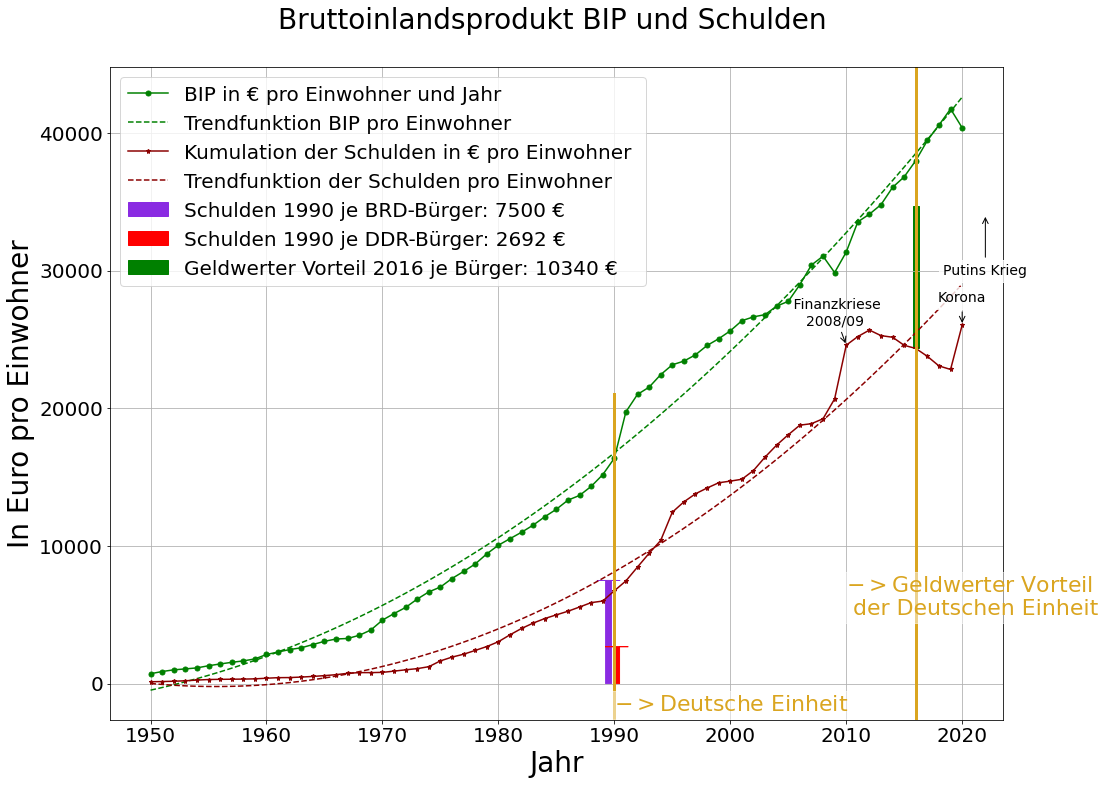

In [12]:
fig=plt.figure(figsize=(16,12))

# Tasächlicher Verlauf BIP
plt.plot(jahre, BIPperEinw, marker='o', color='green',label='BIP in € pro Einwohner und Jahr', markersize=5)
# Ausgleichsfunktion BIP
X,Y=ausgleich.quadratisch(jahre, BIPperEinw) #,   k=[0])
plt.plot(X, Y , '--', color='green',label='Trendfunktion BIP pro Einwohner', markersize=1)

# Tasächlicher Verlauf Schulden
plt.plot(jahre, schulden_perEinw, marker='*', color='darkred',label='Kumulation der Schulden in € pro Einwohner ', markersize=5)
# Ausgleichsfunktion Schulden
X,Y=ausgleich.quadratisch(jahre, schulden_perEinw) #,   k=[0])
plt.plot(X, Y , '--', color='darkred',label='Trendfunktion der Schulden pro Einwohner', markersize=1)

# Wendezeitpunkt
plt.axvline(x=1990, ymin=0, ymax=0.5, color="goldenrod", linewidth=3)
plt.text(1990, -2000, '$->$Deutsche Einheit', fontsize = 22, color='goldenrod', bbox=dict(color='white', facecolor='white', alpha=0.5))
# Schulden 1990
plt.arrow(1990-0.5,0,0,SchuldenBRDjeBuerger1990, width=0.5,length_includes_head=True, head_width=2,head_length=5, color='blueviolet', label=f'Schulden 1990 je BRD-Bürger: {SchuldenBRDjeBuerger1990:.0f} €' )
plt.arrow(1990+0.2,0,0,SchuldenDDRjeBuerger1990, width=0.5,length_includes_head=True, head_width=2,head_length=3, color='red',        label=f'Schulden 1990 je DDR-Bürger: {SchuldenDDRjeBuerger1990:.0f} €' )
# Geldwerter Vorteil der Deutschen Einheit
plt.axvline(x=2016, ymin=0, ymax=1, color="goldenrod", linewidth=3)
plt.text(2010, 5000, '$->$Geldwerter Vorteil\n der Deutschen Einheit', fontsize = 22, color='goldenrod', bbox=dict(color='white',facecolor='white', alpha=0.5))
plt.arrow(2016,schulden_perEinw[66]+Bilanzgewinn2016jeBuerger,0,-Bilanzgewinn2016jeBuerger, width=0.5,length_includes_head=True, head_width=0,head_length=5,shape='full', color='green', label=f'Geldwerter Vorteil 2016 je Bürger: {Bilanzgewinn2016jeBuerger:.0f} €' )

# Annotationen
plt.annotate(' Finanzkriese\n2008/09', xy=(2010,schulden_perEinw[60]), xycoords= 'data', xytext=(2009,28000), fontsize = 14,
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='top')
plt.annotate('Korona', xy=(2020,schulden_perEinw[70]), xycoords= 'data', xytext=(2020,28500), fontsize = 14,
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='top',
            bbox=dict(color='white',facecolor='white', alpha=0.8))
plt.annotate('Putins Krieg', xy=(2022,schulden_perEinw[70]+8000), xycoords= 'data', xytext=(2022,28500+2000), fontsize = 14,
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='top',
            bbox=dict(color='white',facecolor='white', alpha=0.8))

# Beschriftung
plt.title('Bruttoinlandsprodukt BIP und Schulden \n', size=28)
plt.xlabel('Jahr', size=28)
plt.ylabel('In Euro pro Einwohner', size=28)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.grid()
# Speichern
plt.savefig('BIPundSchulden_perEinw.png')
plt.show()

## 5. Steuereinnahmen und Schulden

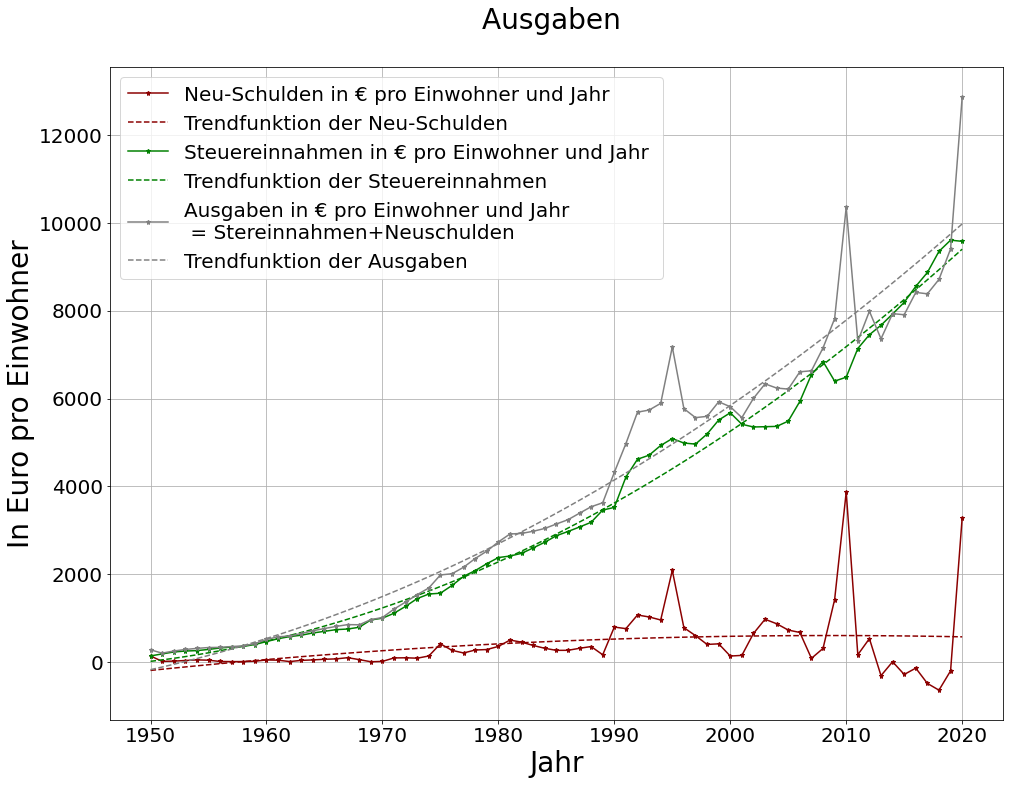

In [13]:
fig=plt.figure(figsize=(16,12))


# Neu-Schulden
plt.plot(jahre, neuschulden_perEinw, marker='*', color='darkred',label='Neu-Schulden in € pro Einwohner und Jahr ', markersize=5)
# Ausgleichsfunktion Schulden
X,Y=ausgleich.quadratisch(jahre, neuschulden_perEinw) #,   k=[0])
plt.plot(X, Y , '--', color='darkred',label='Trendfunktion der Neu-Schulden', markersize=1)
# Steuern
plt.plot(jahre, steuern_perEinw, marker='*', color='green',label='Steuereinnahmen in € pro Einwohner und Jahr ', markersize=5)
# Ausgleichsfunktion Schulden
X,Y=ausgleich.quadratisch(jahre, steuern_perEinw) #,   k=[0])
plt.plot(X, Y , '--', color='green',label='Trendfunktion der Steuereinnahmen', markersize=1)
# Ausgaben=Steuern+Schulden
plt.plot(jahre, steuern_perEinw+neuschulden_perEinw, marker='*', color='gray',label='Ausgaben in € pro Einwohner und Jahr\n = Stereinnahmen+Neuschulden', markersize=5)
# Ausgleichsfunktion Ausgaben
X,Y=ausgleich.quadratisch(jahre, steuern_perEinw+neuschulden_perEinw) #,   k=[0])
plt.plot(X, Y , '--', color='gray',label='Trendfunktion der Ausgaben', markersize=1)



# Beschriftung
plt.title('Ausgaben \n', size=28)
plt.xlabel('Jahr', size=28)
plt.ylabel('In Euro pro Einwohner', size=28)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.grid()
# Speichern
plt.savefig('Einnahmen_und_Schulden_perEinw.png')
plt.show()

### Bemerkungen zum Diagramm
- Bei den Werten für das Jahr 2021 handelt es sich um Schätzwerte. 

## 5. Bundesrentenzuschüsse & öffentliche Bildungsausgaben

In [14]:
DZ=  6      # Veratz zur Excelnummerierung der Zeilen
Z0=  0+DZ   # 1. Datenzeile
Z1= 71+DZ   # letzte Datenzeile
# Rentenzuschüsse in Mrd. € ----------------------------------
rentenzuschuesse_west = df1[Z0:Z1, 9].astype(float)
rentenzuschuesse_ost  = df1[Z0:Z1,10].astype(float)
rentenzuschuesse_MWS  = df1[Z0:Z1,11].astype(float)
print(' Bundeszuschüsse zur ges. Rentenversicherung')
print('west: ', rentenzuschuesse_west, '\nost: ',rentenzuschuesse_ost, '\naus MWSt: ',rentenzuschuesse_MWS )
# Bildungsausgaben ---------------------------------------------
bildungsausgaben_gesamt=df1[Z0:Z1,14].astype(float)
print('Bildungsausgaben: ', bildungsausgaben_gesamt)
# Bevölkerung West, Ost
einwohner_west = df1[Z0:Z1, 3].astype(float)
einwohner_ost  = df1[Z0:Z1, 4].astype(float)
print(f'Einwohner, west: {einwohner_west} ')
print(f'Einwohner, ost: {einwohner_ost} ')



 Bundeszuschüsse zur ges. Rentenversicherung
west:  [ 0.5262  0.7114  0.8966  1.0818  1.267   1.4328  1.5986  1.7644  1.9302
  2.096   2.2784  2.4608  2.6432  2.8256  3.008   3.1384  3.2688  3.3992
  3.5296  3.66    4.2942  4.9284  5.5626  6.1968  6.831   7.6252  8.4194
  9.2136 10.0078 10.802  11.2122 11.6224 12.0326 12.4428 12.853  13.3192
 13.7854 14.2516 14.7178 15.184  19.624  19.79   20.768  23.99   23.914
 25.179  27.447  28.961  27.173  26.2    26.617  27.381  28.793  29.196
 29.515  29.469  29.992  30.158  30.491  31.472  31.348  31.57   30.494
 31.138  31.472  32.312  34.396  35.035  36.305  37.827  37.827 ] 
ost:  [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     3.957  4.597  5.878  6.531  7.152  7.776  8.214  7.384  7.141
  7.212  7.405  7.796  7

In [15]:

rentenzuschuesse_west_proEinwohner=np.zeros(len(rentenzuschuesse_west))
np.divide(rentenzuschuesse_west,einwohner_west, rentenzuschuesse_west_proEinwohner)
rentenzuschuesse_west_proEinwohner *= 1000

rentenzuschuesse_ost_proEinwohner=np.zeros(len(rentenzuschuesse_ost))
np.divide(rentenzuschuesse_ost,einwohner_ost, rentenzuschuesse_ost_proEinwohner)
rentenzuschuesse_ost_proEinwohner *= 1000

rentenzuschuesse_MWS_proEinwohner=np.zeros(len(rentenzuschuesse_MWS))
np.divide(rentenzuschuesse_MWS,(einwohner_west+rentenzuschuesse_ost), rentenzuschuesse_MWS_proEinwohner)
rentenzuschuesse_MWS_proEinwohner *= 1000

# Bildungsausgaben pro Einwohner
bildung_jeEinwohner=np.zeros(len(bildungsausgaben_gesamt))
np.divide(bildungsausgaben_gesamt,einwohner, bildung_jeEinwohner)
bildung_jeEinwohner *= 1000
# Rente
print(f'Rentenzuschüsse je Einwohner, west: {rentenzuschuesse_west_proEinwohner} ')
print(f'Rentenzuschüsse je Einwohner, ost:  {rentenzuschuesse_ost_proEinwohner} ')
print(f'Rentenzuschüsse aus MWS je Einwohner:  {rentenzuschuesse_MWS_proEinwohner} ')
# Bildung
print(f'Bildungsausgaben je Einwohner:  {bildung_jeEinwohner} ')

Rentenzuschüsse je Einwohner, west: [ 10.21747573  13.68076923  17.07809524  20.41132075  23.68224299
  26.53333333  26.86722689  32.08        35.09454545  37.42857143
  40.32566372  43.17192982  45.96869565  48.71724138  51.41880342
  53.19322034  50.67906977  56.65333333  58.82666667  60.
  70.31603078  80.60843965  90.87730763 101.1227154  111.34474328
 124.14848584 135.3818942  149.66861598 162.56985055 175.07293355
 181.13408724 187.15619968 193.13964687 199.0848     204.99202552
 211.75198728 211.75729647 225.14375987 232.50868878 238.36734694
 305.57458736 305.68427556 318.23475329 364.70051687 360.69381599
 378.85946434 411.99339538 433.67774783 405.93068419 390.46199702
 398.33882071 411.496844   434.54572895 442.49772658 449.23896499
 448.9488117  457.33455322 460.28693529 465.7959059  481.22324159
 478.30332621 480.6638246  463.29383166 472.07398423 476.12708018
 487.176781   516.84447784 524.67240734 541.86567164 564.58208955
 564.58208955] 
Rentenzuschüsse je Einwohner, os

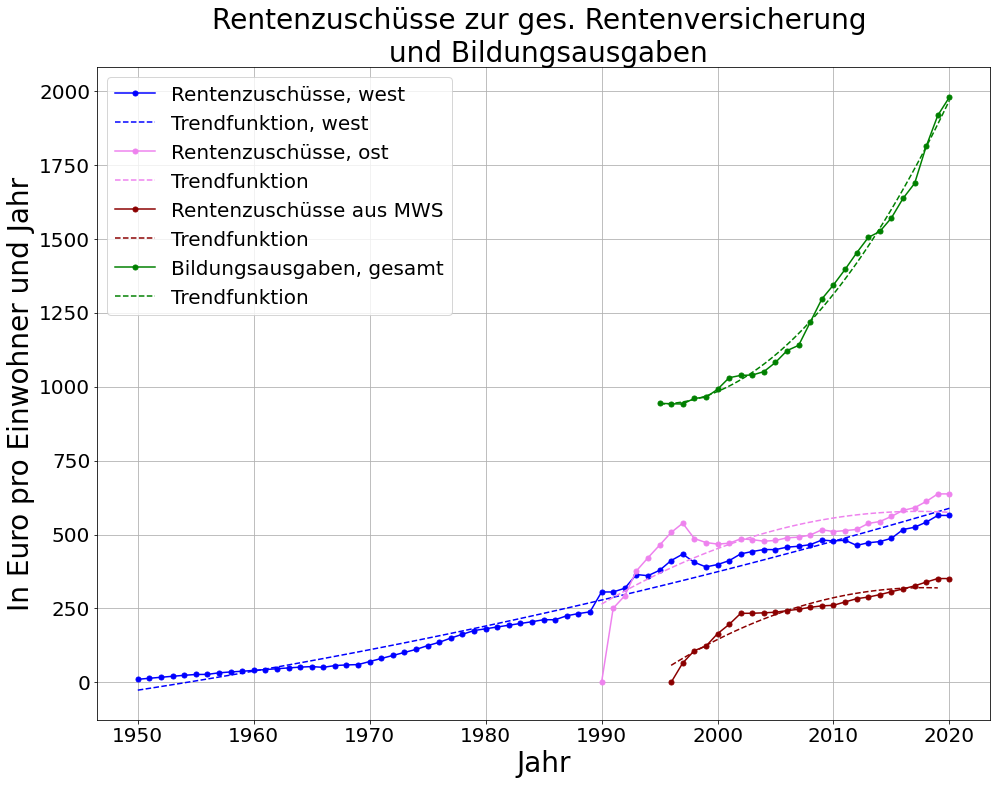

In [16]:
fig=plt.figure(figsize=(16,12))

# Rentenzuschüsse West --------------
plt.plot(jahre, rentenzuschuesse_west_proEinwohner, marker='o', color='blue',label='Rentenzuschüsse, west', markersize=5)
# Ausgleichsfunktion ²
X,Y=ausgleich.quadratisch(jahre, rentenzuschuesse_west_proEinwohner) #,   k=[0])
plt.plot(X, Y , '--', color='blue',label='Trendfunktion, west', markersize=1)
# Rentenzuschüsse Ost ------------------
plt.plot(jahre[40:71], rentenzuschuesse_ost_proEinwohner[40:71], marker='o', color='violet',label='Rentenzuschüsse, ost', markersize=5)
# Ausgleichsfunktion ²
X,Y=ausgleich.quadratisch(jahre[40:71], rentenzuschuesse_ost_proEinwohner[40:71]) #,   k=[0])
plt.plot(X, Y , '--', color='violet',label='Trendfunktion', markersize=1)
# Rentenzuschüsse MWS --------------------
plt.plot(jahre[46:71], rentenzuschuesse_MWS_proEinwohner[46:71], marker='o', color='darkred',label='Rentenzuschüsse aus MWS', markersize=5)
# Ausgleichsfunktion ²
X,Y=ausgleich.quadratisch(jahre[46:70], rentenzuschuesse_MWS_proEinwohner[46:70]) #,   k=[0])
plt.plot(X, Y , '--', color='darkred',label='Trendfunktion', markersize=1)
# Bildung +++++++++++++++++++++++++++++++
plt.plot(jahre[45:71], bildung_jeEinwohner[45:71], marker='o', color='green',label='Bildungsausgaben, gesamt', markersize=5)
# Ausgleichsfunktion ²
X,Y=ausgleich.quadratisch(jahre[45:71], bildung_jeEinwohner[45:71]) #,   k=[0])
plt.plot(X, Y , '--', color='green',label='Trendfunktion', markersize=1)


# Beschriftung
plt.title('Rentenzuschüsse zur ges. Rentenversicherung \n und Bildungsausgaben', size=28)
plt.xlabel('Jahr', size=28)
plt.ylabel('In Euro pro Einwohner und Jahr', size=28)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.grid()
# Speichern
plt.savefig('Rentenzuschuesse_und_Bildungsausgaben.png')
plt.show()